In [52]:
%load_ext autoreload
%autoreload 2

In [53]:
import wishart_lib, wishart_lib_stepan

import sys
sys.path.append("..")

from indexes import indexes_lib
from generator import generator_lib
import numpy as np
from matplotlib import pyplot as plt
import importlib

import sys
sys.path.append("..")
importlib.reload(wishart_lib_stepan)
importlib.reload(wishart_lib)
importlib.reload(indexes_lib)
importlib.reload(generator_lib)

<module 'generator.generator_lib' from '/home/mrplotva/time_series/wishart/../generator/generator_lib.py'>

<b>Functions for clusters and vectors</b>

In [102]:
from wishart_lib import Wishart
WISHART_R = 10
WISHART_U = 0.2
wishart = Wishart(WISHART_R, WISHART_U)

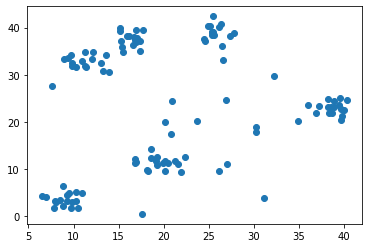

In [149]:
generator = generator_lib.Generator(cnt_=100, clusters_cnt_=6)
res = generator.generate_with_noise(20)
arr = np.array(res)
xs = arr[:, 0]
ys = arr[:, 1]
plt.scatter(xs, ys)
plt.show()

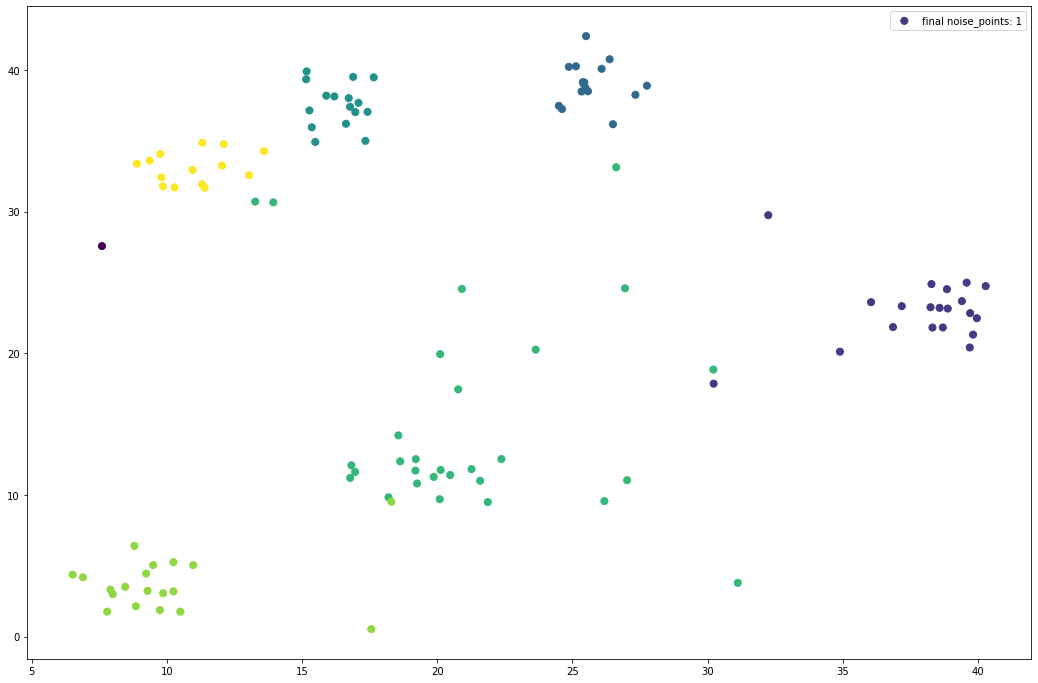

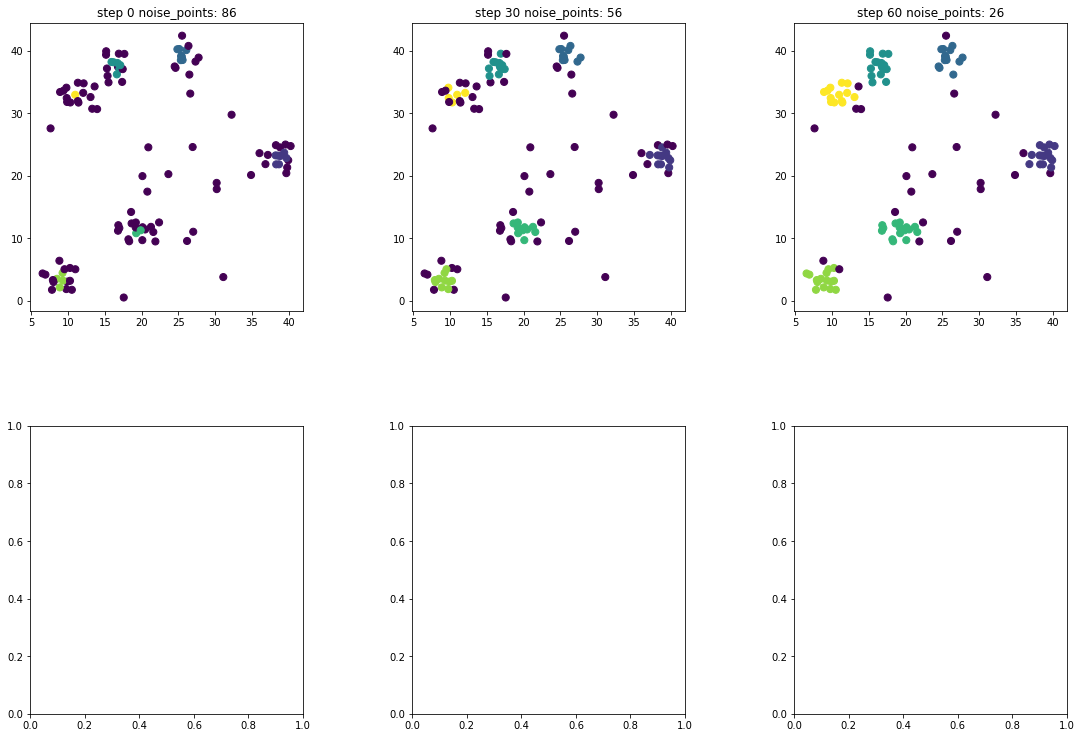

In [150]:
from indexes.indexes_lib import MeasureIndexes

step = 30
row_size = 3
w, shots = wishart.fit_with_visualization(arr, step)
plt.figure(figsize=(18, 12))
plt.scatter(xs, ys, c=w, s=50, label=f'final noise_points: {w.tolist().count(0)}')
plt.legend(loc='best')
plt.show()
# shots = shots[:10]
fig, axs = plt.subplots(max((len(shots) + row_size - 1) // row_size, 2), row_size, figsize=(18,12))
# scatter = ax.scatter(xs,ys,c=w,s=50)
for i in range(len(shots)):
    axs[i // row_size, i % row_size].scatter(xs, ys, c=shots[i], s=50,)
    axs[i // row_size, i % row_size].set_title(f'step {i * step} noise_points: {shots[i].tolist().count(0)}')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

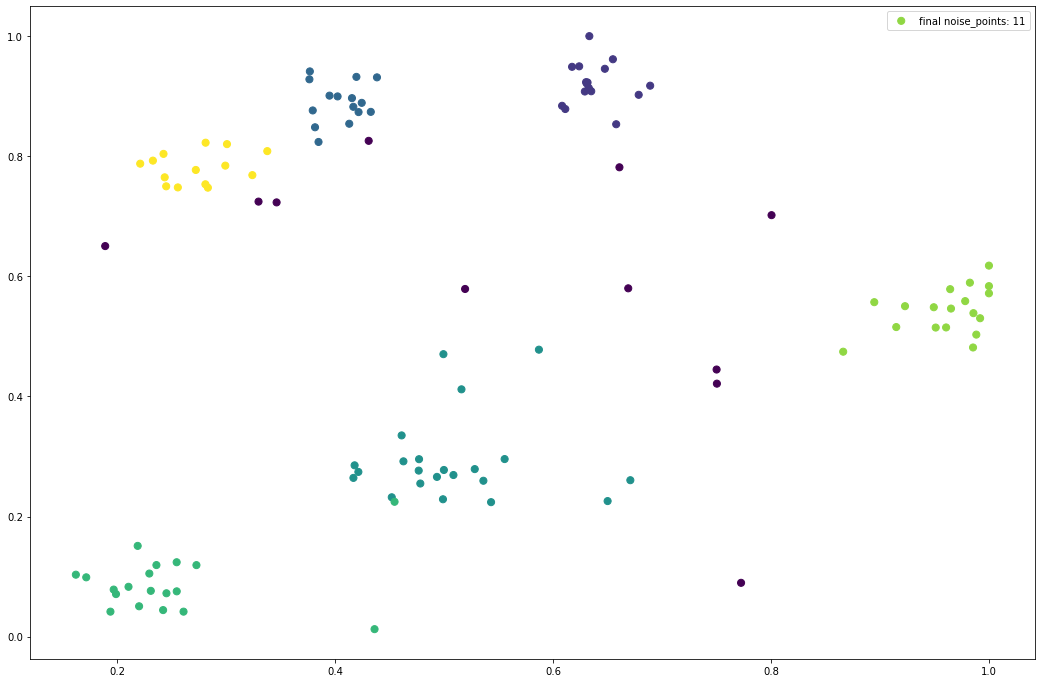

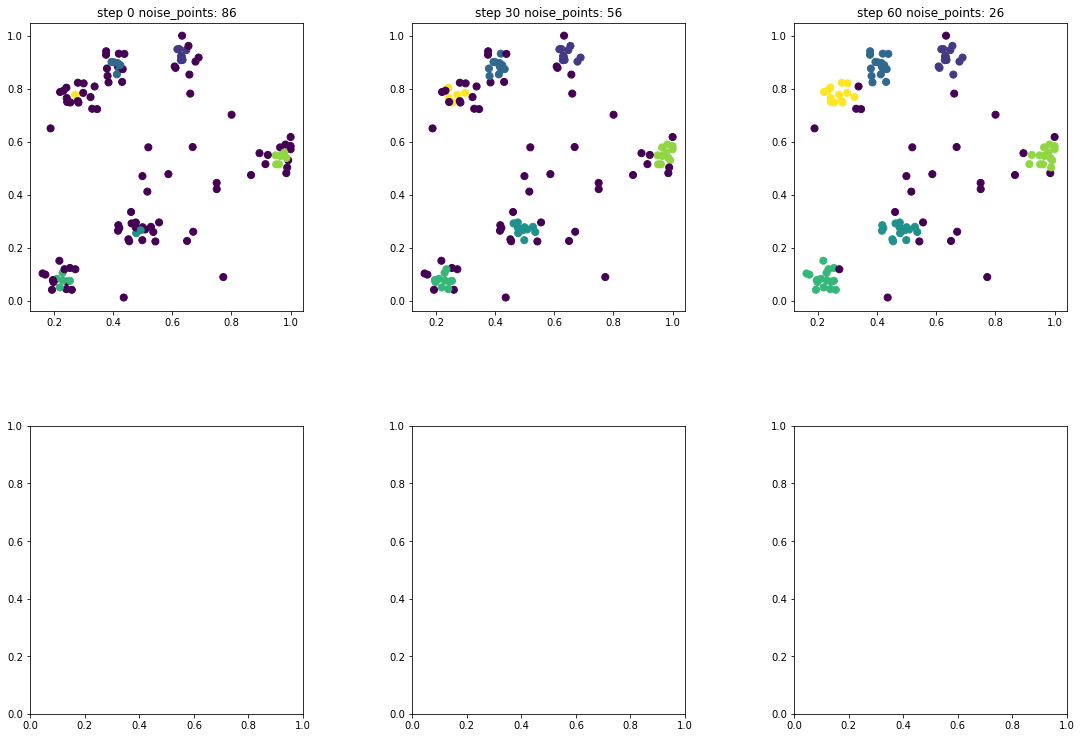

In [151]:
xs /= max(xs)
ys /= max(ys)
arr[0] /= max(arr[0])
arr[1] /= max(arr[1])
from indexes.indexes_lib import MeasureIndexes

step = 30
row_size = 3
w, shots = wishart.fit_with_visualization(arr, step)
plt.figure(figsize=(18, 12))
plt.scatter(xs, ys, c=w, s=50, label=f'final noise_points: {w.tolist().count(0)}')
plt.legend(loc='best')
plt.show()
# shots = shots[:10]
fig, axs = plt.subplots(max((len(shots) + row_size - 1) // row_size, 2), row_size, figsize=(18,12))
# scatter = ax.scatter(xs,ys,c=w,s=50)
for i in range(len(shots)):
    axs[i // row_size, i % row_size].scatter(xs, ys, c=shots[i], s=50,)
    axs[i // row_size, i % row_size].set_title(f'step {i * step} noise_points: {shots[i].tolist().count(0)}')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [82]:
from indexes.indexes_lib import MeasureIndexes


calculator = MeasureIndexes(arr, w)

res = calculator.Calculate()
for key in res:
    print(key, res[key])

COMPRESSING
RS 0.8151313861145199
G 814.2638450949888
CH 259.04326282174435
D 0.01573252157080746
S 0.5403930773273655
DB 0.7976775034496547
XB 0.4284112966843962


<b>Get centers for Clusters</b>

In [ ]:
from itertools import groupby
WISHART_R = 10
WISHART_U = 0.2
def get_centers(x_train):
    N = len(x_train[0])
    wishart = Wishart(WISHART_R, WISHART_U)
    labels = wishart.fit(x_train)
    sorted_by_cluster = sorted(range(len(labels)), key=lambda x: labels[x])
    centers = []
    for wi, cluster in groupby(sorted_by_cluster, lambda x: labels[x]):
        cluster = list(cluster)
        center = np.full(N, 0.0)
        for i in cluster:
            center += x_train[i]
        centers.append(center / len(cluster))

    return centers
    